In [40]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

[1] "epl-player-shooting-stats-23-24-premier-league"

# **Import**

In [286]:
library(ggplot2)
library(dplyr)
library(psych)
library(ggcorrplot)
library(gridExtra)


# **1. Data Import & Structure**

In [42]:
data <- read.csv('/kaggle/input/epl-player-shooting-stats-23-24-premier-league/player_shooting_2023_2024.csv')

* **Rk: Index of the player in the list.**
* **Player: Name of the player.**
* **Nation: Nationality of the player.**
* **Pos: Position of the player on the field.**
* **Squad: Team the player belongs to.**
* **Age: Age of the player at the time of Aug 1st 2023(season start).**
* **Born: Birth year of the player.**
* **90s: Number of 90-minute intervals the player participated in.**
* **Gls: Total goals scored by the player.**
* **Sh: Total shots taken by the player.**
* **SoT: Shots on target by the player.**
* **SoT%: Shot accuracy percentage.**
* **Sh/90: Shots per 90 minutes.**
* **SoT/90: Shots on target per 90 minutes.**
* **G/Sh: Goals per shot.**
* **G/SoT: Goals per shot on target.**
* **Dist: Average distance of shots taken by the player.**
* **FK: Free kicks taken by the player.**
* **PK: Penalty kicks made by the player.**
* **PKatt: Penalty kick attempts by the player.**
* **xG: Expected goals.**
* **npxG: Non-penalty expected goals.**
* **npxG/Sh: Non-penalty expected goals per shot.**
* **G-xG: Difference between actual goals and expected goals.**
* **np:G-xG: Difference between non-penalty actual goals and non-penalty expected goals.**
* **Matches: Link to matches played as a str.**
* **Birth Month: Month of birth of the player.**

In [43]:
str(data)

'data.frame':	584 obs. of  28 variables:
 $ X          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Rk         : chr  "1" "2" "3" "4" ...
 $ Player     : chr  "Max Aarons" "Bénie Adama Traore" "Tyler Adams" "Tosin Adarabioyo" ...
 $ Nation     : chr  "ENG" "CIV" "USA" "ENG" ...
 $ Pos        : chr  "DF" "FW,MF" "MF" "DF" ...
 $ Squad      : chr  "Bournemouth" "Sheffield Utd" "Bournemouth" "Fulham" ...
 $ Age        : num  24 21 25 26 26 22 28 20 22 25 ...
 $ Born       : num  2000 2002 1999 1997 1998 ...
 $ X90s       : num  12.1 4.3 1.2 16 12.9 18.8 19.6 0.1 2.7 23.4 ...
 $ Gls        : num  0 0 0 2 9 6 1 0 0 1 ...
 $ Sh         : num  1 1 0 14 28 36 14 0 8 16 ...
 $ SoT        : num  0 1 0 5 12 15 3 0 2 4 ...
 $ SoT.       : num  0 100 NA 35.7 42.9 41.7 21.4 NA 25 25 ...
 $ Sh.90      : num  0.08 0.23 0 0.88 2.17 1.92 0.71 0 2.95 0.68 ...
 $ SoT.90     : num  0 0.23 0 0.31 0.93 0.8 0.15 0 0.74 0.17 ...
 $ G.Sh       : num  0 0 NA 0.14 0.32 0.17 0.07 NA 0 0.06 ...
 $ G.SoT      : num  NA 0 NA 0.

In [44]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,584,291.50000000,168.73055444,291.500,291.50000000,216.459600,0.00,583.00,583.00,0.000000000,-1.2061661,6.982120022
Rk*,2,584,292.10445205,168.07678465,292.500,292.50000000,216.459600,1.00,563.00,562.00,-0.012226712,-1.2207260,6.955066836
Player*,3,584,281.96404110,160.13204374,286.500,283.29273504,213.494400,1.00,553.00,552.00,-0.066327950,-1.2385158,6.626311118
Nation*,4,584,27.65753425,16.58997542,20.000,26.39743590,13.343400,1.00,66.00,65.00,0.698200891,-0.4929741,0.686498068
Pos*,5,584,5.09760274,3.30222562,4.000,4.95085470,4.447800,1.00,11.00,10.00,0.092485737,-1.3508597,0.136647069
Squad*,6,584,10.95719178,6.00884565,11.000,10.95512821,7.413000,1.00,21.00,20.00,-0.009168106,-1.2220694,0.248647802
Age,7,562,25.77046263,4.36061405,26.000,25.63111111,4.447800,17.00,39.00,22.00,0.284156505,-0.5116479,0.183941402
Born,8,562,1997.51957295,4.36488269,1998.000,1997.66444444,4.447800,1984.00,2007.00,23.00,-0.287974592,-0.4896154,0.184121464
X90s,9,562,12.22455516,9.44462245,11.300,11.66866667,11.934930,0.00,32.00,32.00,0.352415593,-1.1156852,0.398397353


In [45]:
summary(data)

       X              Rk               Player             Nation         
 Min.   :  0.0   Length:584         Length:584         Length:584        
 1st Qu.:145.8   Class :character   Class :character   Class :character  
 Median :291.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   :291.5                                                           
 3rd Qu.:437.2                                                           
 Max.   :583.0                                                           
                                                                         
     Pos               Squad                Age             Born     
 Length:584         Length:584         Min.   :17.00   Min.   :1984  
 Class :character   Class :character   1st Qu.:22.00   1st Qu.:1994  
 Mode  :character   Mode  :character   Median :26.00   Median :1998  
                                       Mean   :25.77   Mean   :1998  
                                       3rd Qu.:29.00   3rd

**Check missing value**

In [46]:
colSums(is.na(data))

X          Rk      Player      Nation         Pos       Squad 
          0           0           0           0           0           0 
        Age        Born        X90s         Gls          Sh         SoT 
         22          22          22          22          22          22 
       SoT.       Sh.90      SoT.90        G.Sh       G.SoT        Dist 
        127          22          22         127         189         127 
         FK          PK       PKatt          xG        npxG     npxG.Sh 
         22          22          22          22          22         127 
       G.xG     np.G.xG     Matches Birth.Month 
         22          22           0           0

**duplicate check**

In [47]:
sum(duplicated(data))

[1] 0

# **2. Data Transform**

In [48]:
data <- na.omit(data)

In [56]:
#Unused columns remove
data <- data[,-c(1,9,27,28)]

**Data Check**

In [57]:
head(data)

,Rk,Player,Nation,Pos,Squad,Age,Born,Gls,Sh,SoT,⋯,G.SoT,Dist,FK,PK,PKatt,xG,npxG,npxG.Sh,G.xG,np.G.xG
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,Bénie Adama Traore,CIV,"FW,MF",Sheffield Utd,21,2002,0,1,1,⋯,0.00,15.3,0,0,0,0.3,0.3,0.27,-0.3,-0.3
4,4,Tosin Adarabioyo,ENG,DF,Fulham,26,1997,2,14,5,⋯,0.40,14.2,0,0,0,0.7,0.7,0.05,1.3,1.3
5,5,Elijah Adebayo,ENG,FW,Luton Town,26,1998,9,28,12,⋯,0.75,9.5,0,0,0,5.6,5.6,0.20,3.4,3.4
6,6,Simon Adingra,CIV,FW,Brighton,22,2002,6,36,15,⋯,0.40,16.3,0,0,0,3.3,3.3,0.09,2.7,2.7
7,7,Nayef Aguerd,MAR,DF,West Ham,28,1996,1,14,3,⋯,0.33,10.8,0,0,0,1.5,1.5,0.11,-0.5,-0.5
9,9,Naouirou Ahamada,FRA,"MF,FW",Crystal Palace,22,2002,0,8,2,⋯,0.00,20.0,0,0,0,0.4,0.4,0.05,-0.4,-0.4


# **3. Data Visualization**

**The team that scored the most goals**

In [87]:
most_goal_team <- data %>%
                    group_by(Squad) %>%
                    summarize(Goal = sum(Gls))

In [88]:
most_goal_team

Squad,Goal
<chr>,<dbl>
Arsenal,71
Aston Villa,63
Bournemouth,44
Brentford,44
Brighton,47
Burnley,31
Chelsea,54
Crystal Palace,36
Everton,32


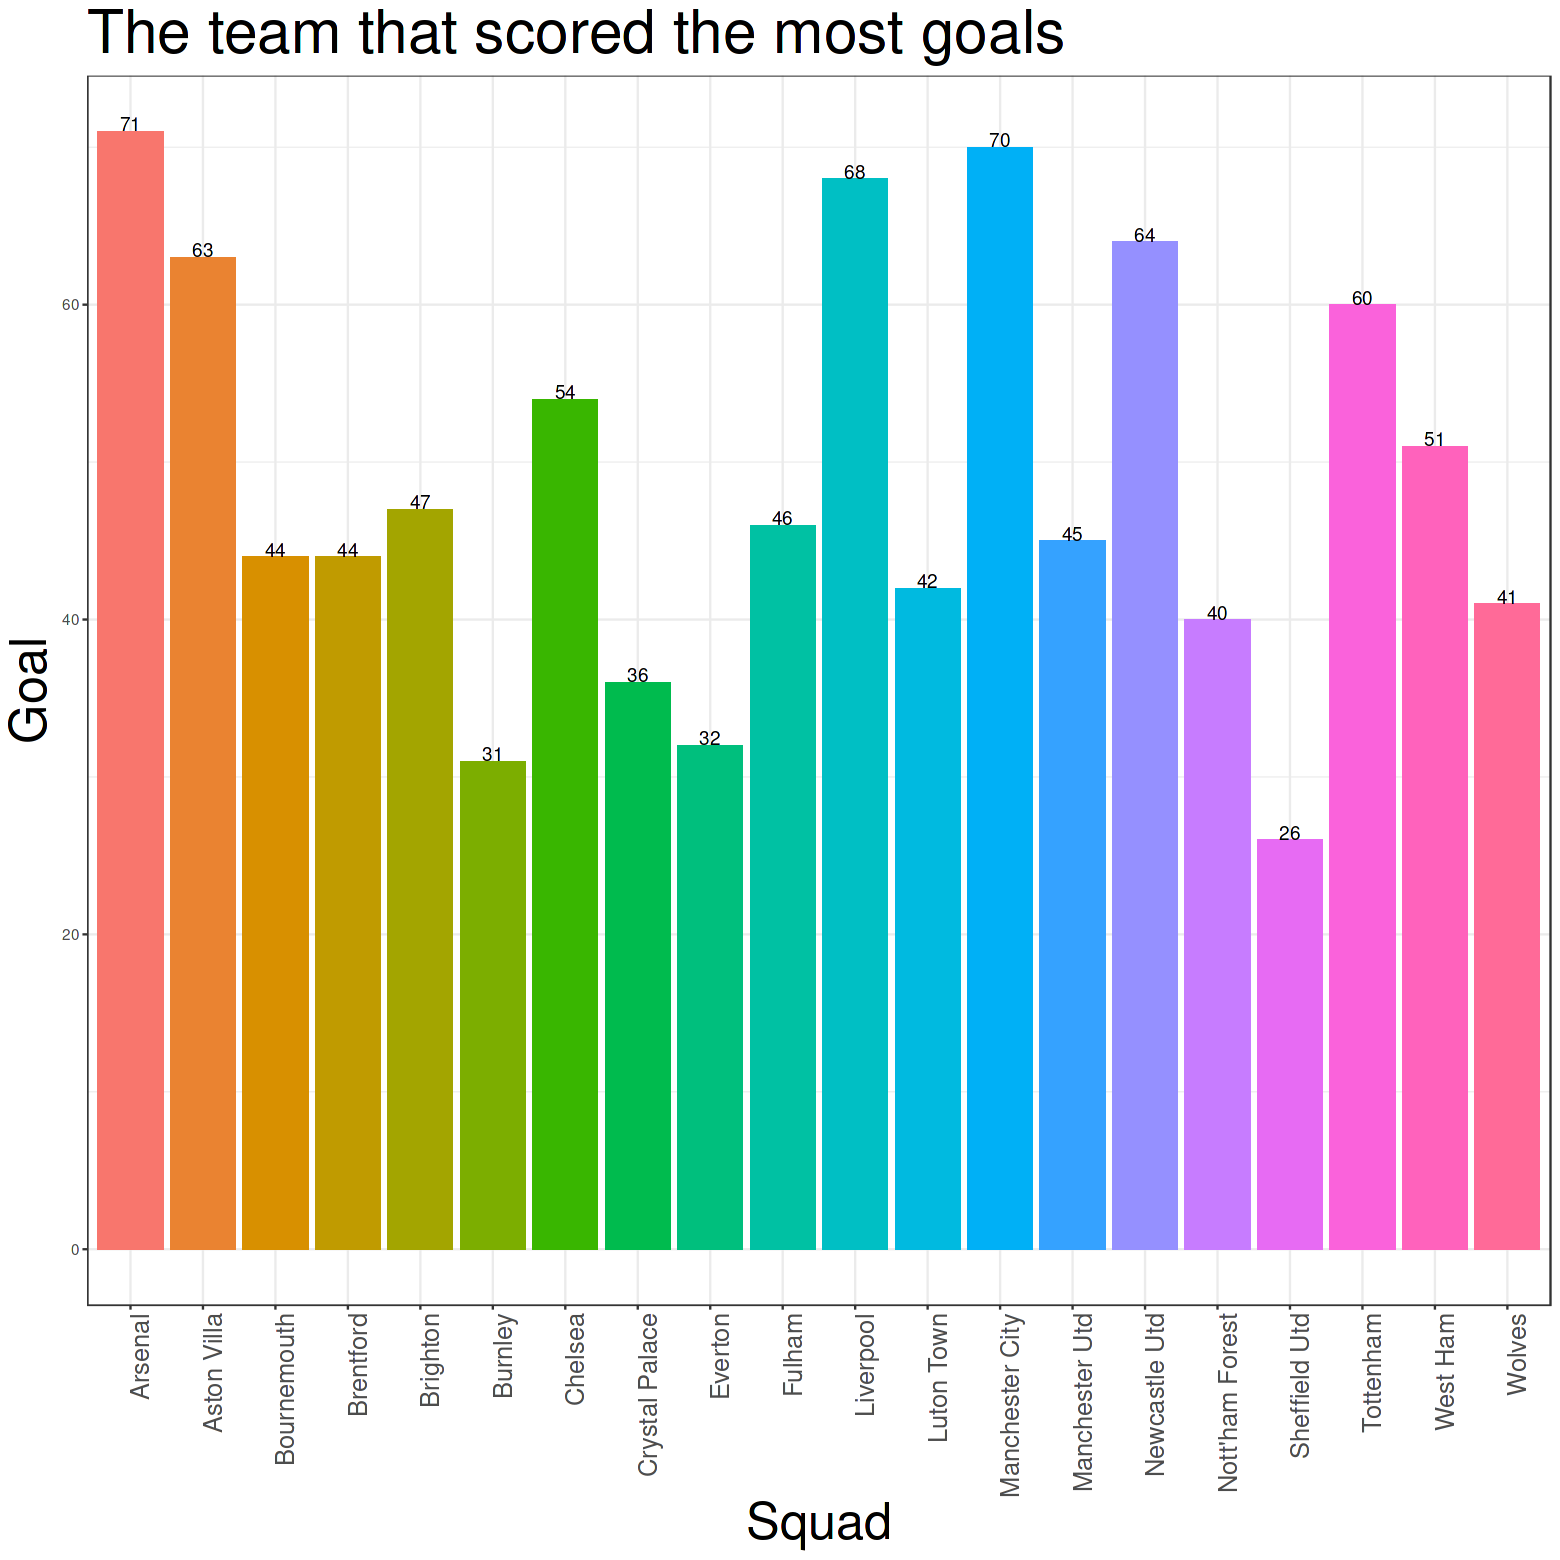

In [306]:
ggplot(most_goal_team) + 
    geom_col(aes(x=Squad , y= Goal, fill = Squad)) + 
    geom_text(aes(x=Squad , y= Goal, label= Goal), vjust=0) +
    ggtitle('The team that scored the most goals') + 
    theme_bw() +
    theme(legend.position = 'none',
         axis.title = element_text(size=30),
         axis.text.x = element_text(size = 15, angle = 90, hjust=1),
         title = element_text(size=30)
         )

---------

**Average age by team**

In [287]:
aag_by_team <- data %>%
                    group_by(Squad) %>%
                    summarize(Avg_age = mean(Age,na.rm=T))

In [288]:
aag_by_team

Squad,Avg_age
<chr>,<dbl>
Arsenal,25.26316
Aston Villa,26.30000
Bournemouth,24.85000
Brentford,26.13636
Brighton,25.80952
Burnley,25.05000
Chelsea,24.15789
Crystal Palace,25.40000
Everton,26.80000


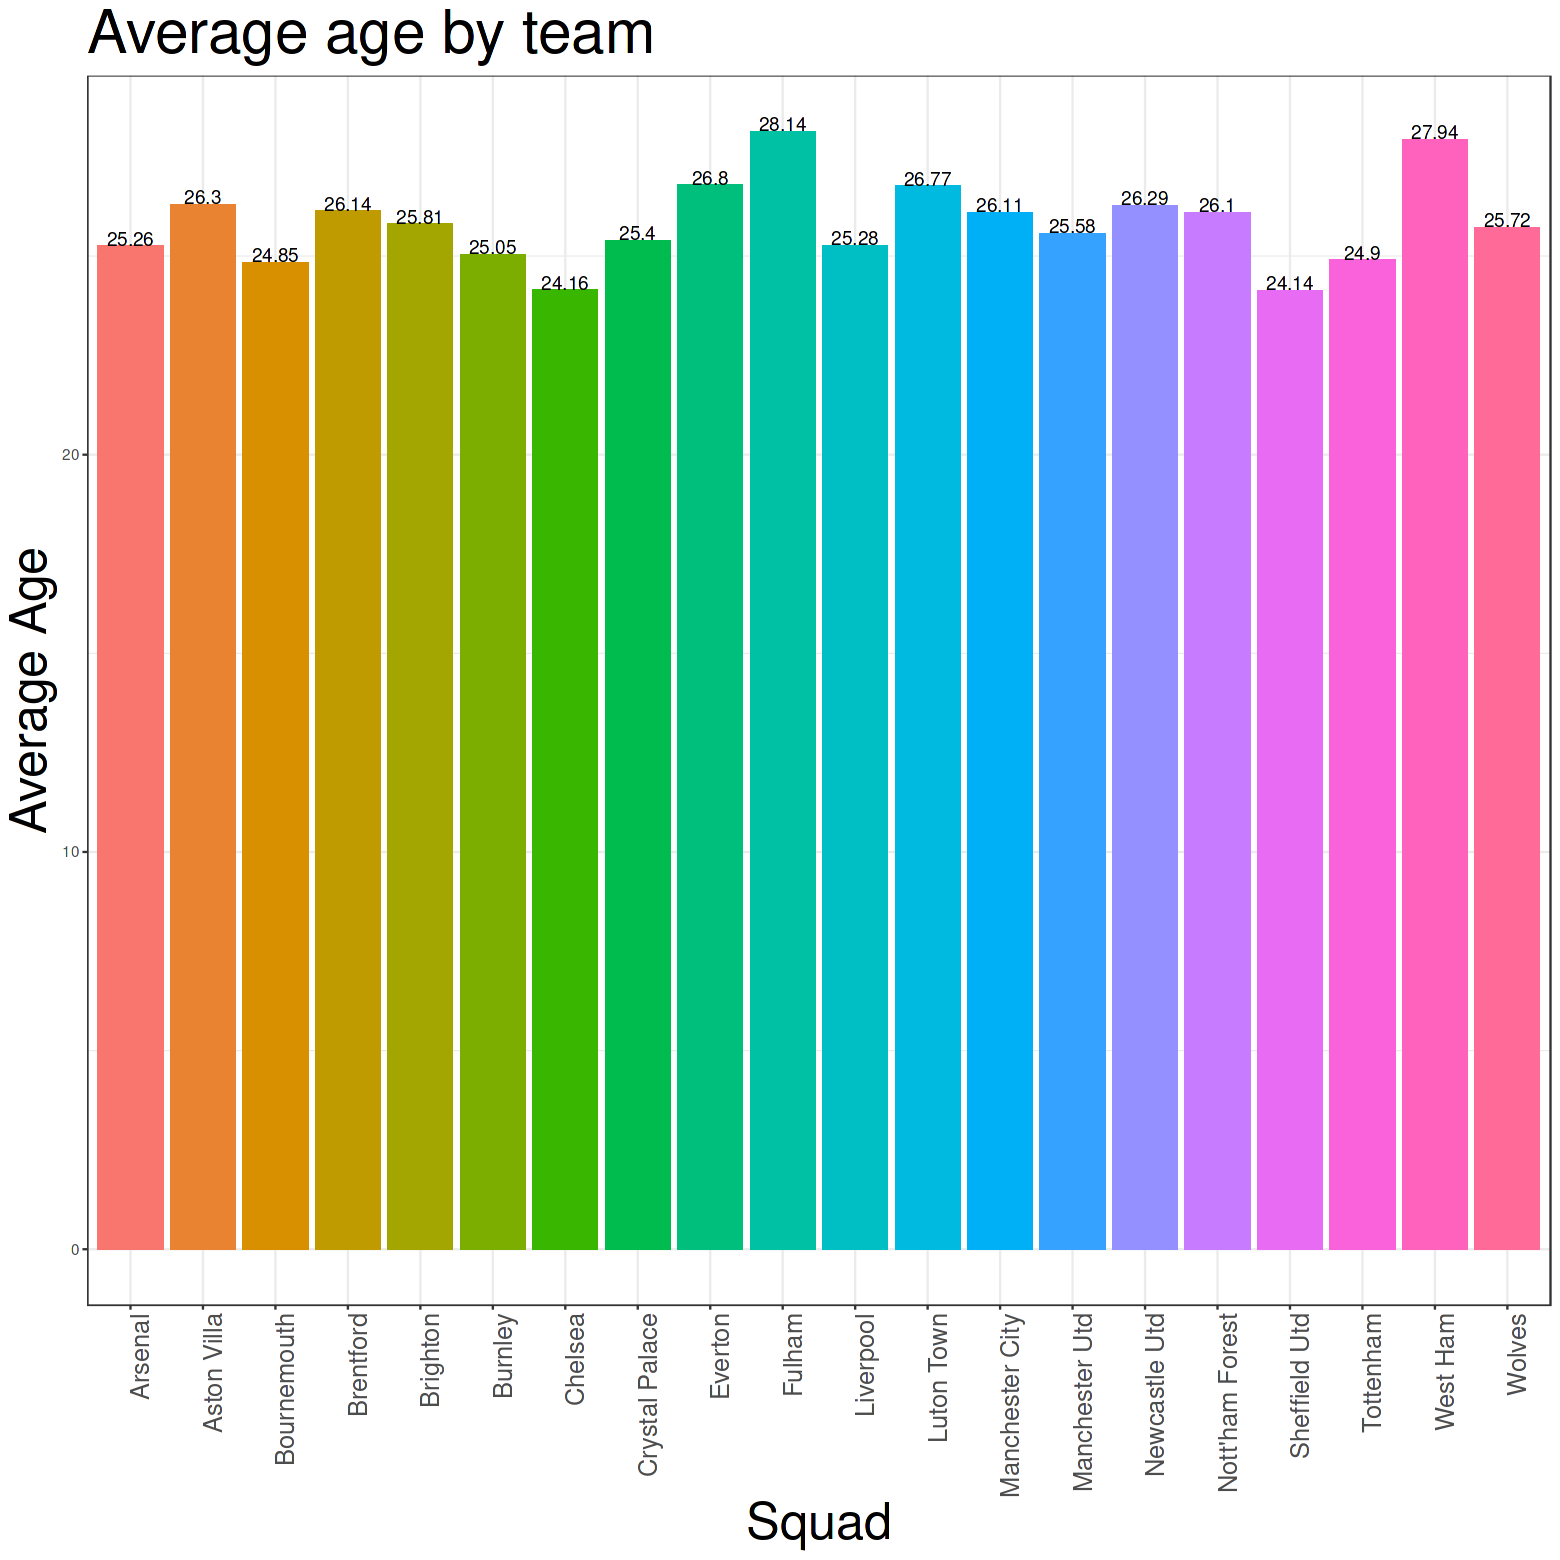

In [308]:
ggplot(aag_by_team) + 
        geom_col(aes(x=Squad , y= Avg_age, fill = Squad)) + 
        geom_text(aes(x=Squad , y= Avg_age, label= round(Avg_age,2)), vjust=0) +
        ggtitle('Average age by team') + 
        ylab('Average Age') +
        theme_bw() +
        theme(legend.position = 'none',
         axis.title = element_text(size=30),
         axis.text.x = element_text(size = 15, angle = 90, hjust=1),
         title = element_text(size=30)
         )

-------

**The team with the highest xg**

In [84]:
most_xg_team <- data %>%
                    group_by(Squad) %>%
                    summarize(xG = sum(xG))

In [85]:
most_xg_team

Squad,xG
<chr>,<dbl>
Arsenal,62.9
Aston Villa,56.4
Bournemouth,46.2
Brentford,52.1
Brighton,47.8
Burnley,30.9
Chelsea,57.0
Crystal Palace,33.7
Everton,47.9


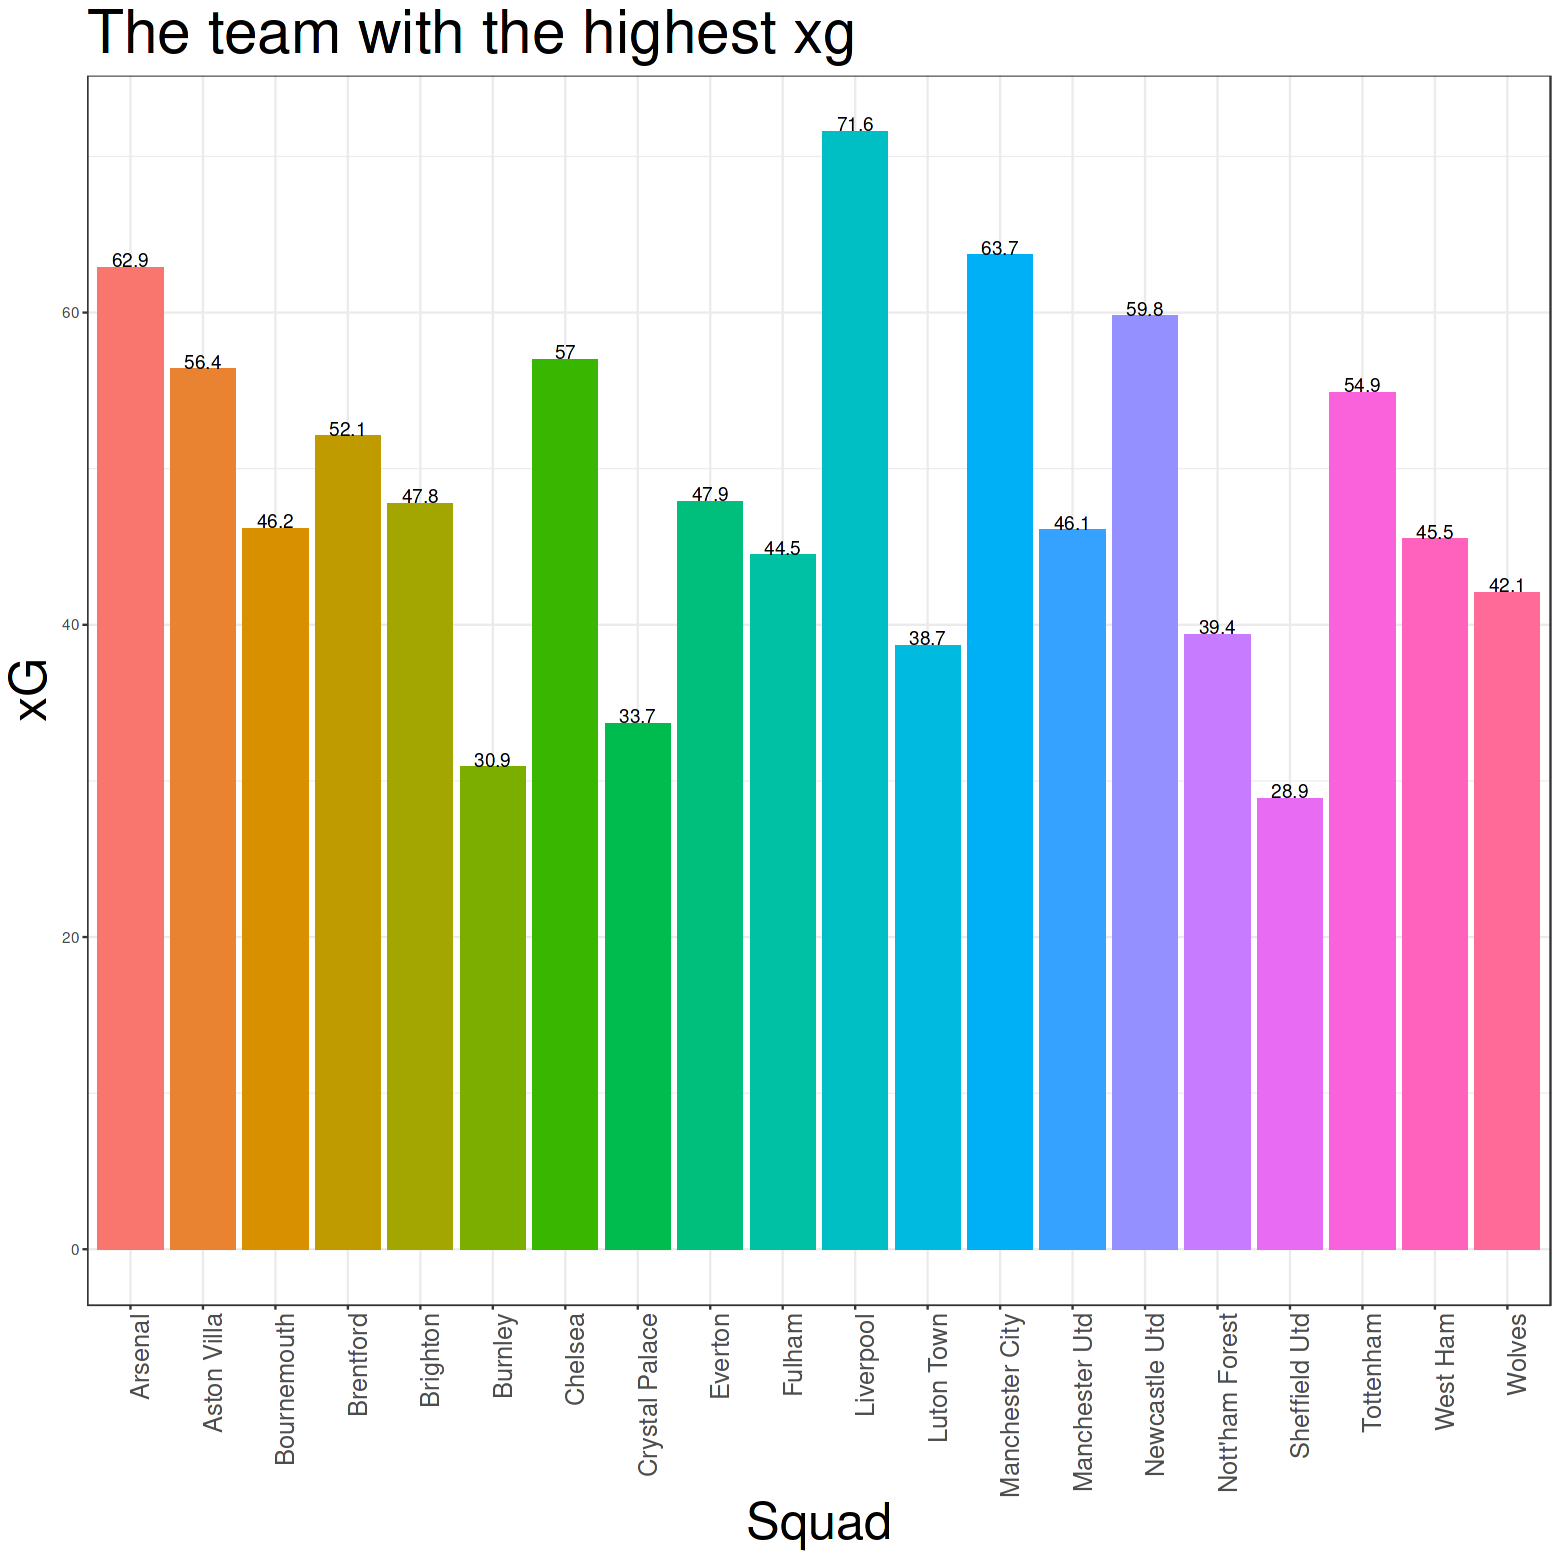

In [309]:
ggplot(most_xg_team) + 
    geom_col(aes(x=Squad , y= xG, fill = Squad)) + 
    geom_text(aes(x=Squad , y= xG, label= xG), vjust=0) +
    ggtitle('The team with the highest xg') + 
    theme_bw() +
    theme(legend.position = 'none',
         axis.title = element_text(size=30),
         axis.text.x = element_text(size = 15, angle = 90, hjust=1),
         title = element_text(size=30)
         )

--------

**The difference between the expected Goal and the actual Goal**

In [113]:
team_xg_goal <- merge(most_goal_team,most_xg_team, by= 'Squad') %>% 
                mutate(Difference = Goal- xG)

In [114]:
team_xg_goal

Squad,Goal,xG,Difference
<chr>,<dbl>,<dbl>,<dbl>
Arsenal,71,62.9,8.1
Aston Villa,63,56.4,6.6
Bournemouth,44,46.2,-2.2
Brentford,44,52.1,-8.1
Brighton,47,47.8,-0.8
Burnley,31,30.9,0.1
Chelsea,54,57.0,-3.0
Crystal Palace,36,33.7,2.3
Everton,32,47.9,-15.9


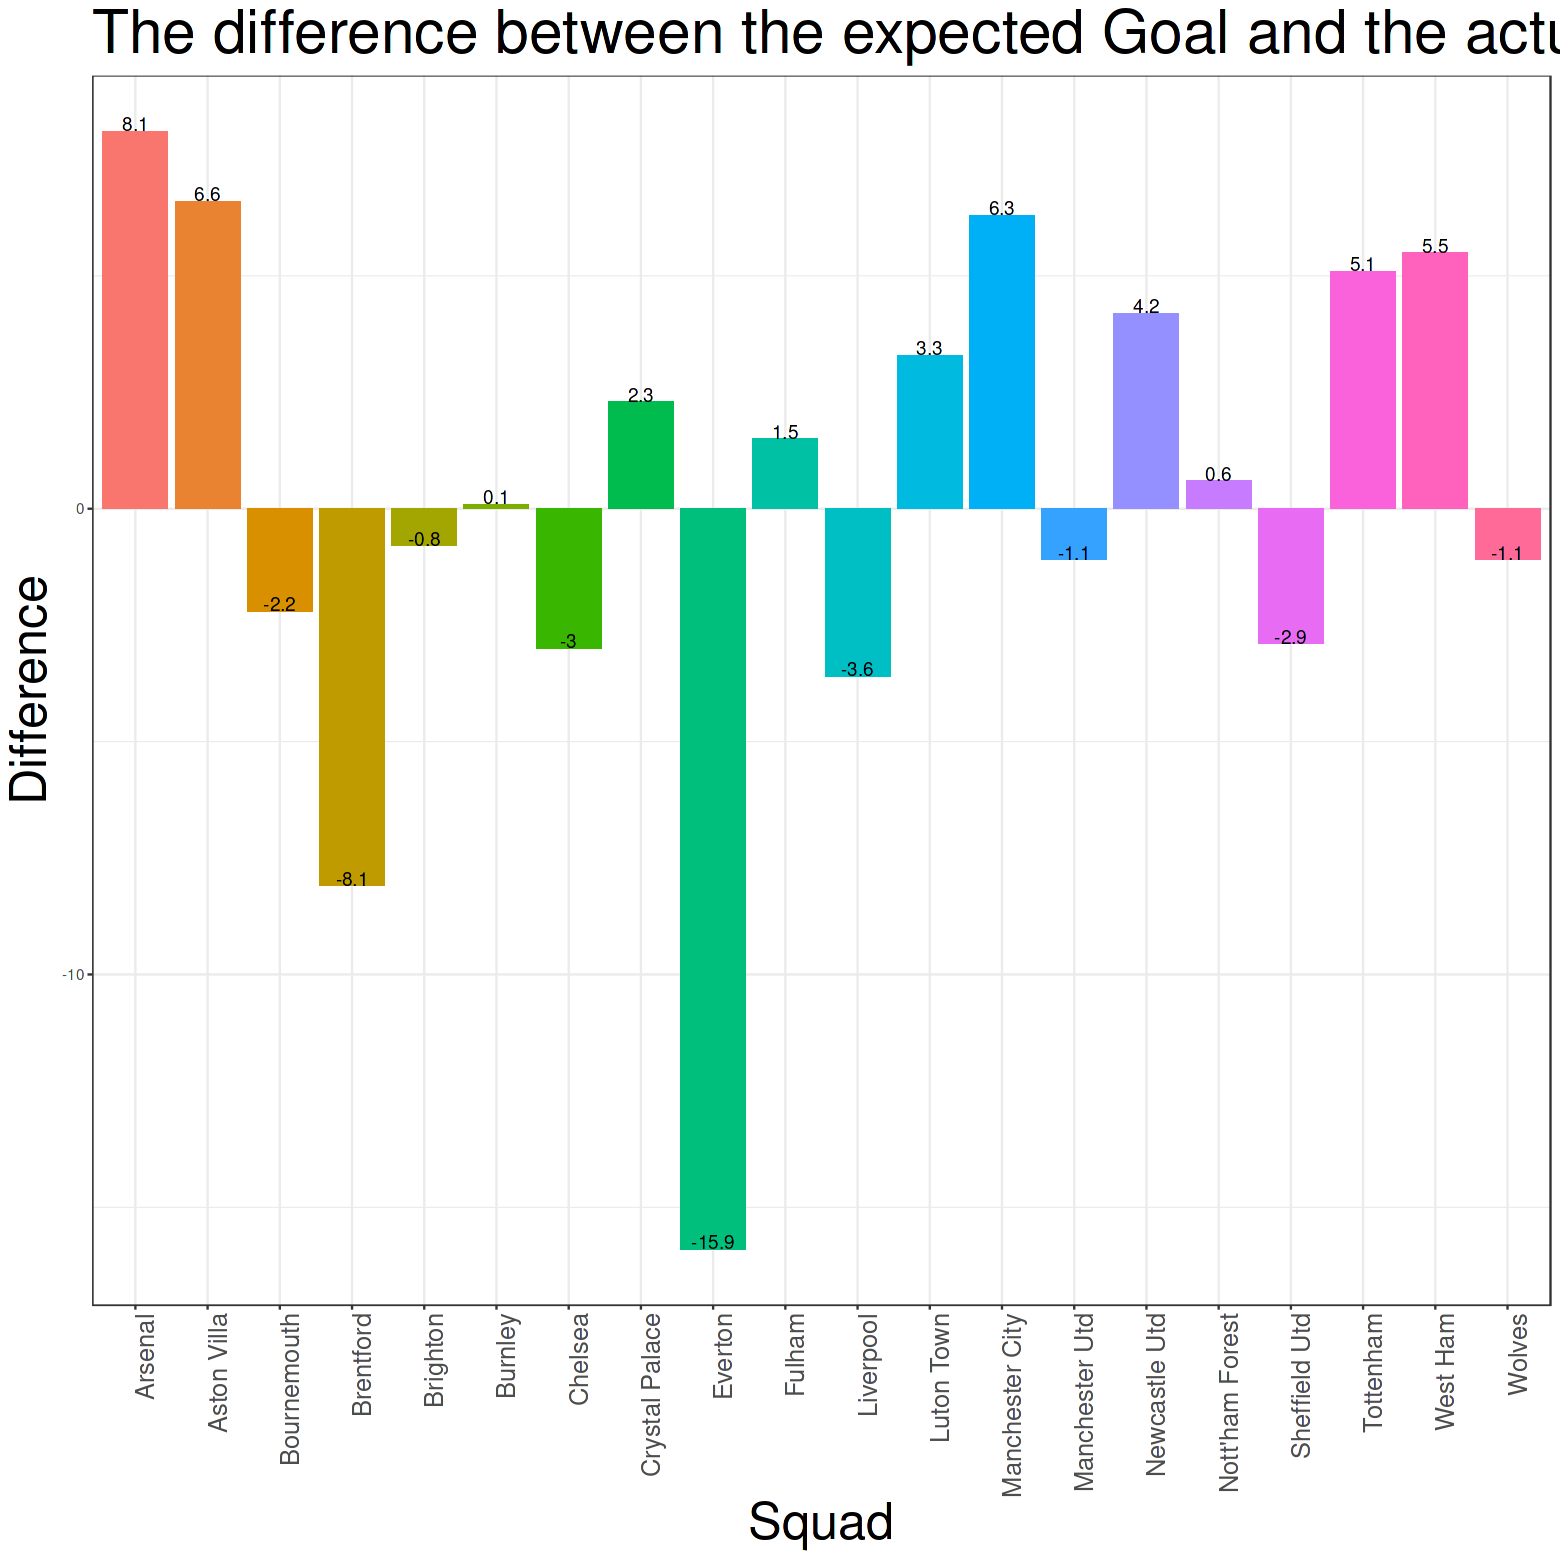

In [312]:
ggplot(team_xg_goal) + 
        geom_col(aes(x= Squad, y = Difference , fill = Squad))+
        geom_text(aes(x=Squad , y= Difference, label= round(Difference,2)), vjust=0) +
        ggtitle('The difference between the expected Goal and the actual Goal') + 
        theme_bw() +
        theme(legend.position = 'none',
         axis.title = element_text(size=30),
         axis.text.x = element_text(size = 15, angle = 90, hjust=1),
         title = element_text(size=30)
         )

-----------

**Comparison of FW top3**

In [244]:
FW <- data[grep('FW',data$Pos),] %>%
            select(Player, Gls, SoT, SoT. , xG) %>%
            arrange(desc(Gls))

fw_top3 <- FW[1:3,]

names(fw_top3) <- c('Player','Goal','Shot', 'Shot_accuracy','xG')

In [251]:
fw_top3

,Player,Goal,Shot,Shot_accuracy,xG
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Erling Haaland,19,41,44.1,21.8
2,Ollie Watkins,18,42,46.2,15.0
3,Mohamed Salah,17,36,42.9,17.9


In [329]:
p1 <- ggplot(fw_top3, aes(x=Player,y=Goal, fill = Player ))+
  geom_col(alpha = 0.2)+
  geom_text(aes(x=Player , y= Goal, label= Goal), vjust= -2.5) +
  coord_polar() +
  theme_bw() +
  ggtitle('Goal Comparison')

p2 <- ggplot(fw_top3, aes(x=Player,y=Shot, fill = Player))+
  geom_col(alpha = 0.2)+
  geom_text(aes(x=Player , y= Shot, label= Shot), vjust= -2.5) +
  coord_polar() +
  theme_bw() +
  ggtitle('Shot Comparison')

p3 <- ggplot(fw_top3, aes(x=Player,y=Shot_accuracy, fill = Player))+
  geom_col(alpha = 0.2)+
  geom_text(aes(x=Player , y= Shot_accuracy, label= Shot_accuracy), vjust= -2.5) +
  coord_polar() +
  theme_bw() +
  ggtitle('Shot_accuracy Comparison')

p4 <- ggplot(fw_top3, aes(x=Player,y=xG, fill = Player))+
  geom_col(alpha = 0.2) +
  geom_text(aes(x=Player , y= xG, label= xG), vjust= -2.5) +
  coord_polar() +
  theme_bw() +
  ggtitle('xG Comparison')

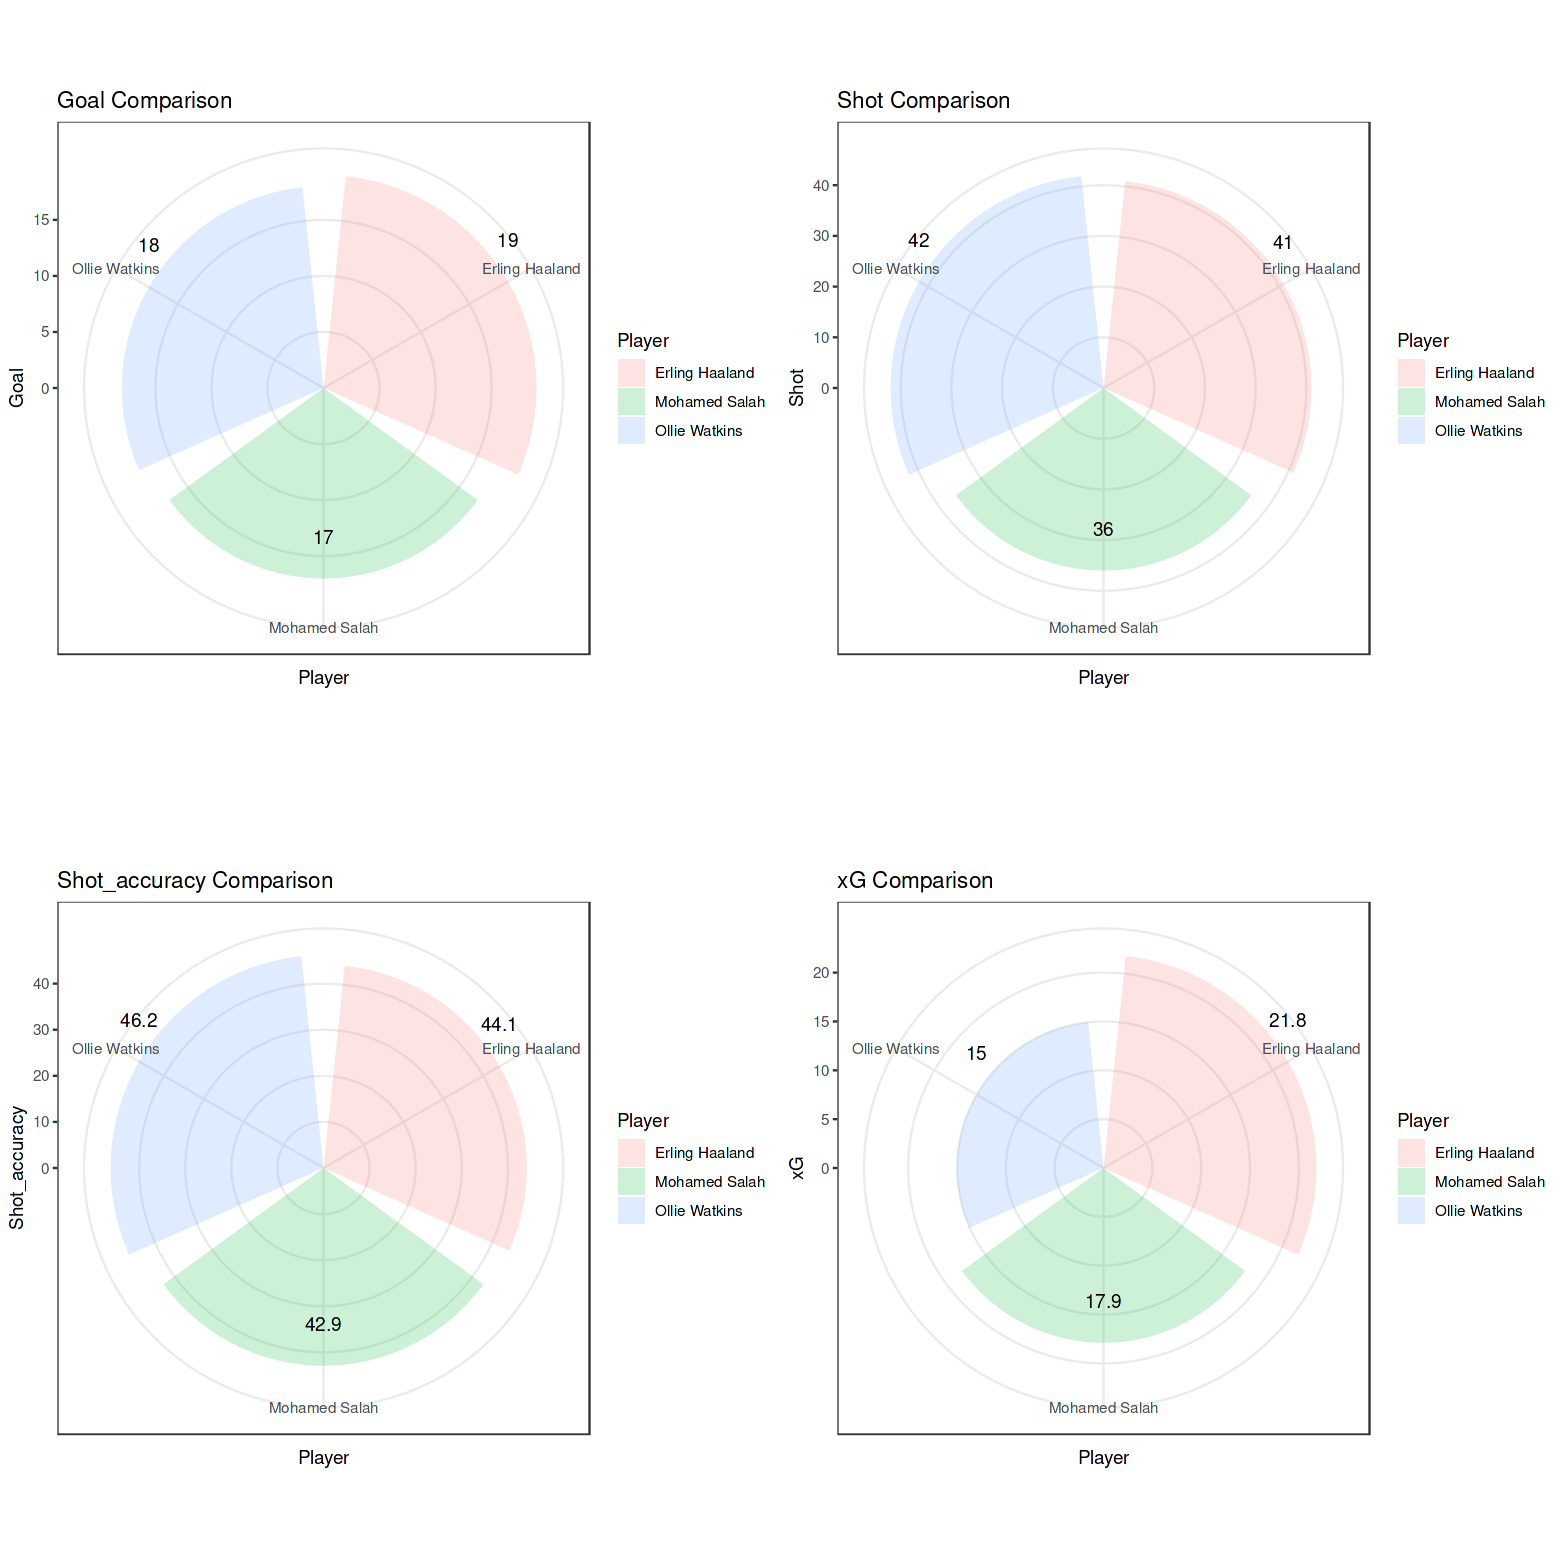

In [330]:
grid.arrange(p1,p2,p3,p4,ncol = 2)

------

**Number of pk acquisitions and success rate by team**

In [339]:
pk_by_team <- data %>%
                group_by(Squad) %>%
                summarize(pkatt = sum(PKatt), pk = sum(PK) , succese_prob = round((pk / pkatt) * 100 ,2))

In [340]:
pk_by_team

Squad,pkatt,pk,succese_prob
<chr>,<dbl>,<dbl>,<dbl>
Arsenal,9,9,100.00
Aston Villa,4,4,100.00
Bournemouth,2,1,50.00
Brentford,3,3,100.00
Brighton,5,5,100.00
Burnley,2,2,100.00
Chelsea,11,10,90.91
Crystal Palace,4,4,100.00
Everton,2,1,50.00


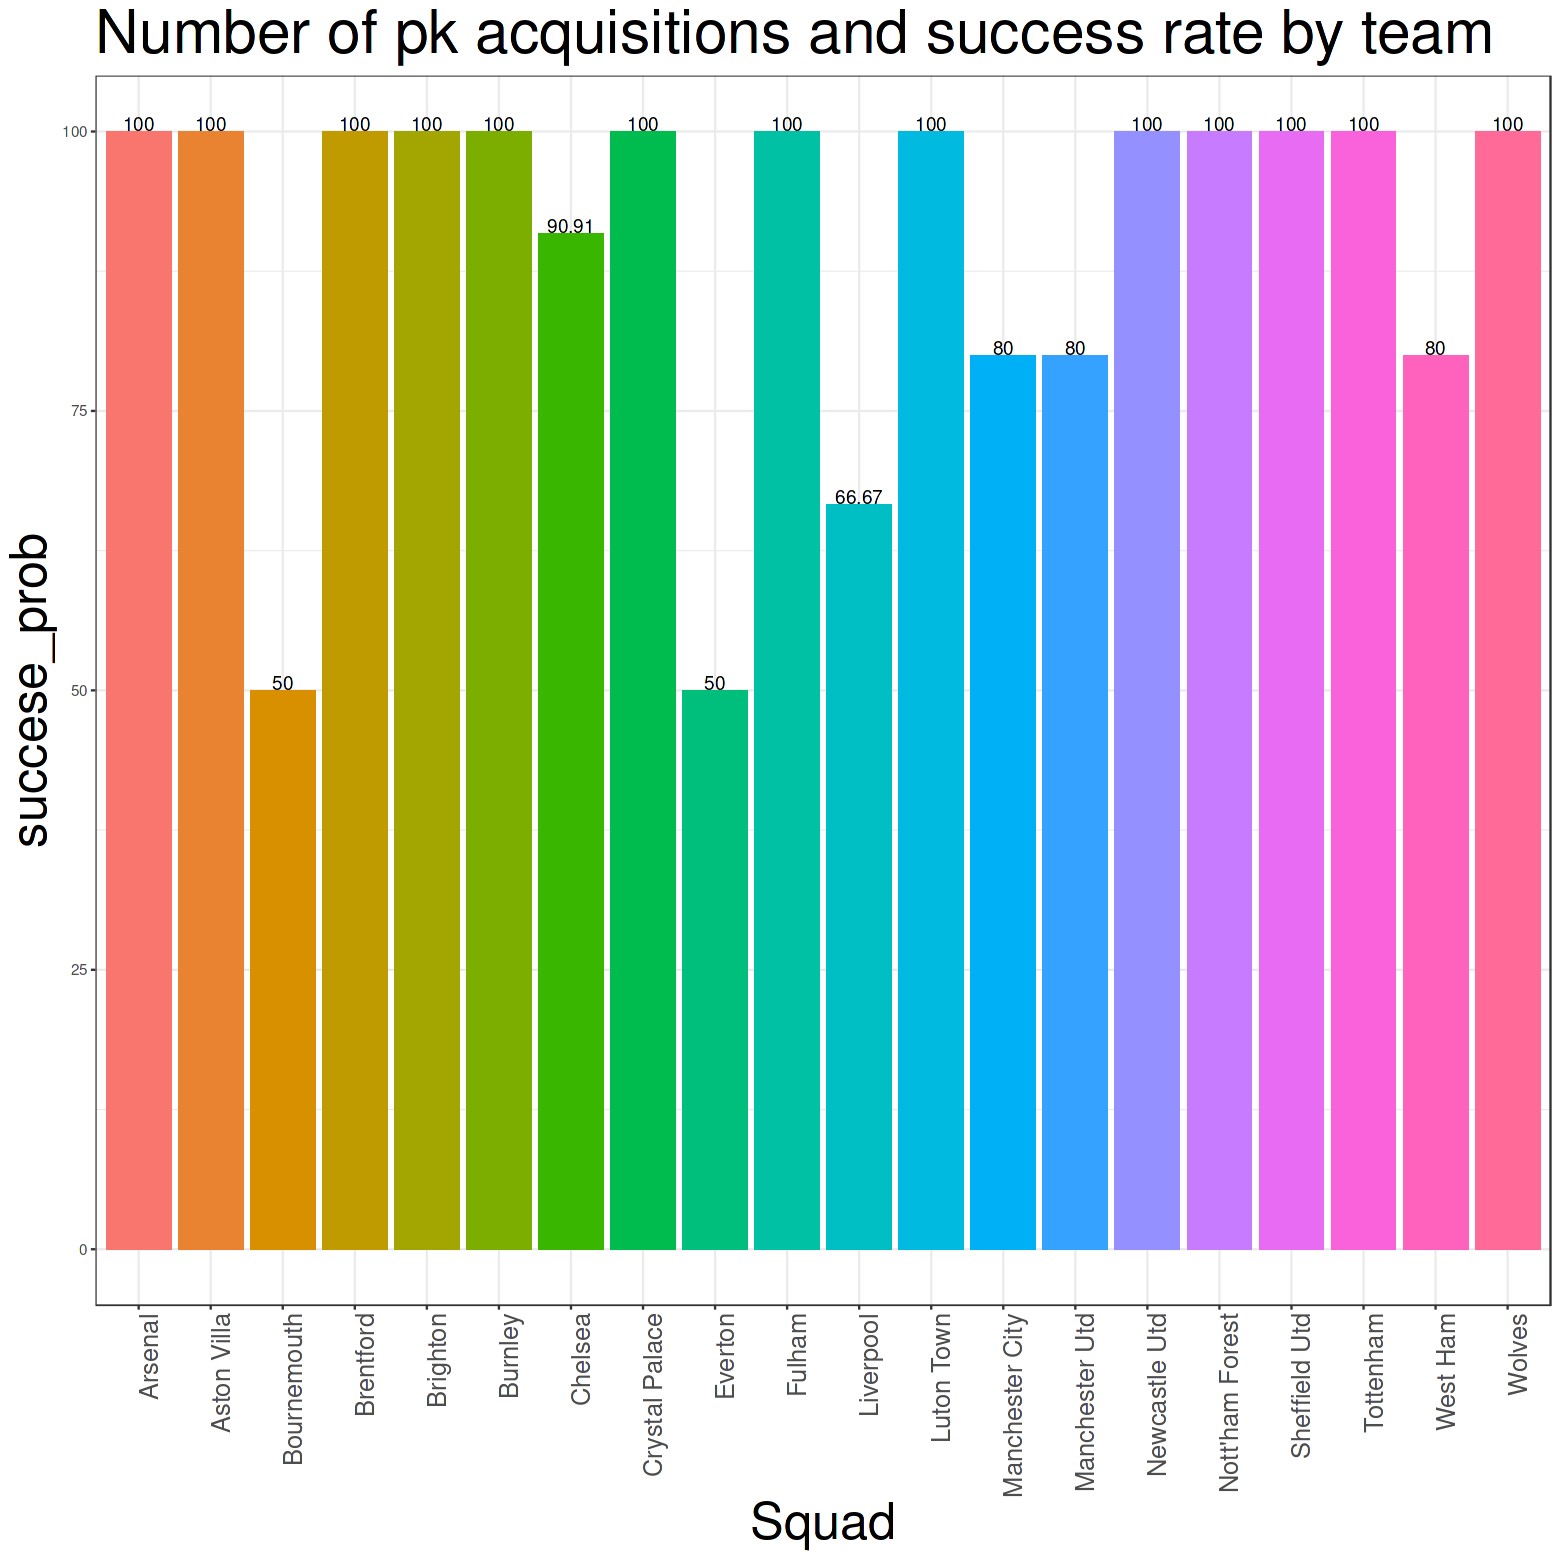

In [342]:
ggplot(pk_by_team) + 
            geom_col(aes(x=Squad , y= succese_prob, fill = Squad)) +
            geom_text(aes(x=Squad , y= succese_prob, label= succese_prob), vjust=0) +
            ggtitle('Number of pk acquisitions and success rate by team') + 
            theme_bw() +
            theme(legend.position = 'none',
            axis.title = element_text(size=30),
            axis.text.x = element_text(size = 15, angle = 90, hjust=1),
            title = element_text(size=30)
            )